# Titanic - Machine Learning from Disaster

A kaggle prediction competition, view [here](https://www.kaggle.com/competitions/titanic/data?select=gender_submission.csv)

1. Libraries and Functions
2. Import Data
3. Analyse Data
4. Preprocessing
5. Train Data
6. Test Data
7. Export

# 1. Libraries and Functions

- pandas: for making data to table form
- seaborn: to make beautiful visualisations
- matplotlib: to create graphs and plots

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# https://stackoverflow.com/questions/40372030/pandas-round-to-the-nearest-n
def roundasint(x, base=1):
    return int(base * round(float(x)/base))

# 2. Import Data

Import data using pandas `read_csv`

In [2]:
test = pd.read_csv("data/test.csv")
train = pd.read_csv("data/train.csv")

# 3. Analyse Data

## 1. See the first few rows of the data

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Describe the data to see its numerical information

In [4]:
train.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## 3. Create a correlation map using seaborn

<AxesSubplot:>

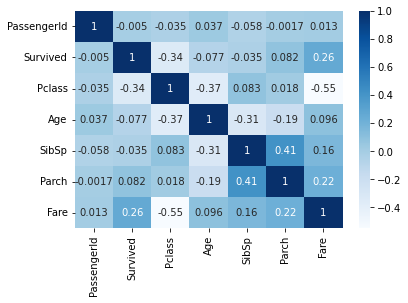

In [5]:
sns.heatmap(train.corr(), cmap = "Blues", annot=True)

In [6]:
pd.DataFrame(train.corr()['Survived']).sort_values(by='Survived', key=abs)[0:-1]

,Survived
PassengerId,-0.005007
SibSp,-0.035322
Age,-0.077221
Parch,0.081629
Fare,0.257307
Pclass,-0.338481


## Analysing Features

Some features can be expanded as it raise some possible correlation

1. Does having any `SibSp` matter in survival?
2. Is `Age` relevant to survival? 
    a. Does being older than 40 in `Age` relevant? Per human prime time is up to 40 years old.
    b. Does being a child affect your survival chances?
3. Does having a better `Pclass` affect your survival?
4. Does the `Cabin` codes mean something?

### 1. Does having any `SibSp` matter in survival?

From the bar chart we can see the more siblings/spouses you have onboard, you will be more likely to not survive. From the graph we can see the cut off is at 4. From here we can group those that have `SibSp_big` "5 or more" and `SibSp_sml` "4 or less".

,Yes,No
SibSp,,
0,34.539474,65.460526
1,53.588517,46.411483
2,46.428571,53.571429
3,25.000000,75.000000
4,16.666667,83.333333
5,0.000000,100.000000
8,0.000000,100.000000


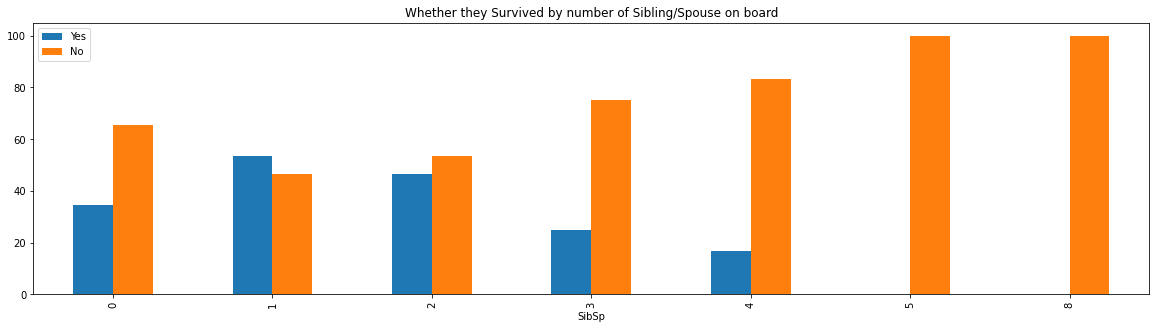

In [43]:
temp = train.loc[:,['SibSp','Survived']]

temp['nYes'] = [0]*len(temp)
temp['nNo'] = [0]*len(temp)

temp.loc[train['Survived'] == 1, 'nYes'] = 1
temp.loc[train['Survived'] == 0, 'nNo'] = 1

temp = temp.drop(columns = ['Survived']).groupby('SibSp').sum()

temp['Yes'] = 100 * (temp['nYes'] / (temp['nYes'] + temp['nNo']))
temp['No'] = 100 * (temp['nNo'] / (temp['nYes'] + temp['nNo']))

temp = temp.drop(columns = ['nYes', 'nNo'])

temp.plot(kind='bar', figsize=(20,5), title="Whether they Survived by number of Sibling/Spouse on board")
temp

### 2. Is `Age` relevant to survival?

There seem to be no obvious pattern in age. The people aged 60 or older only have limited number of people so we cannot consider it as a "for sure" chance. Thus, we will dwelve deeper.

a. Does being older than 40 in `Age` relevant? Per human prime time is up to 40 years old.

b. Does being a child affect your survival chances?

<AxesSubplot:title={'center':'Whether they Survived by Age'}, xlabel='Age'>

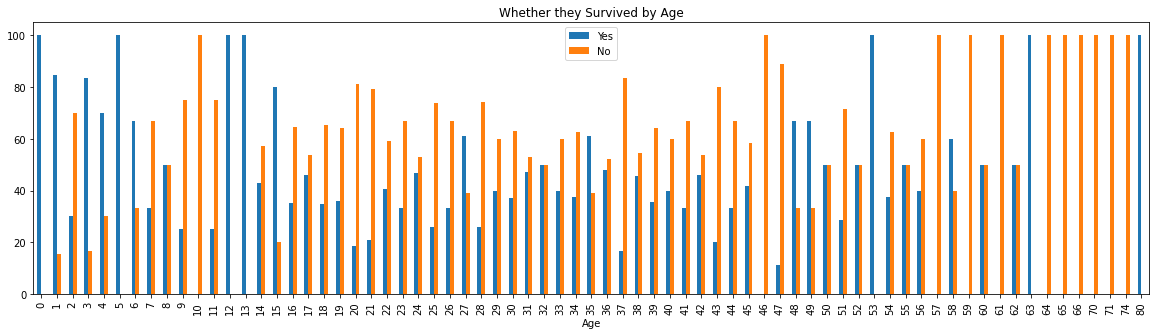

In [51]:
temp = train.loc[:,['Age','Survived']]

# remove those with Null in Age
temp = temp[~temp['Age'].isnull()]

temp['Age'] = temp['Age'].apply(lambda x: roundasint(x, 1))

temp['nYes'] = [0]*len(temp)
temp['nNo'] = [0]*len(temp)

temp.loc[train['Survived'] == 1, 'nYes'] = 1
temp.loc[train['Survived'] == 0, 'nNo'] = 1

temp = temp.drop(columns = ['Survived']).groupby('Age').sum()

temp['Yes'] = 100 * (temp['nYes'] / (temp['nYes'] + temp['nNo']))
temp['No'] = 100 * (temp['nNo'] / (temp['nYes'] + temp['nNo']))

temp = temp.drop(columns = ['nYes', 'nNo'])

temp.plot(kind='bar', figsize=(20,5), title="Whether they Survived by Age")

<AxesSubplot:title={'center':'Whether they Survived by Age (Grouped by 10)'}, xlabel='Age'>

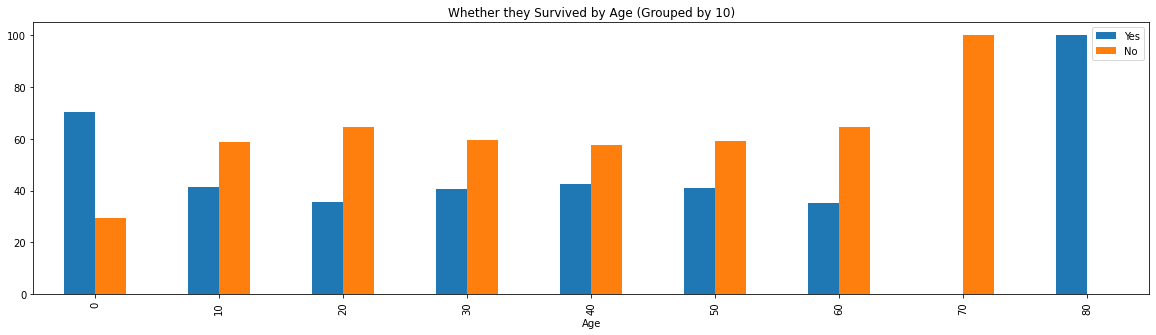

In [55]:
temp = train.loc[:,['Age','Survived']]

# remove those with Null in Age
temp = temp[~temp['Age'].isnull()]

temp['Age'] = temp['Age'].apply(lambda x: roundasint(x, 10))

temp['nYes'] = [0]*len(temp)
temp['nNo'] = [0]*len(temp)

temp.loc[train['Survived'] == 1, 'nYes'] = 1
temp.loc[train['Survived'] == 0, 'nNo'] = 1

temp = temp.drop(columns = ['Survived']).groupby('Age').sum()

temp['Yes'] = 100 * (temp['nYes'] / (temp['nYes'] + temp['nNo']))
temp['No'] = 100 * (temp['nNo'] / (temp['nYes'] + temp['nNo']))

temp = temp.drop(columns = ['nYes', 'nNo'])

temp.plot(kind='bar', figsize=(20,5), title="Whether they Survived by Age (Grouped by 10)")

,Yes,No
Age_grp,,
40 above,36.666667,63.333333
40 or less,41.666667,58.333333


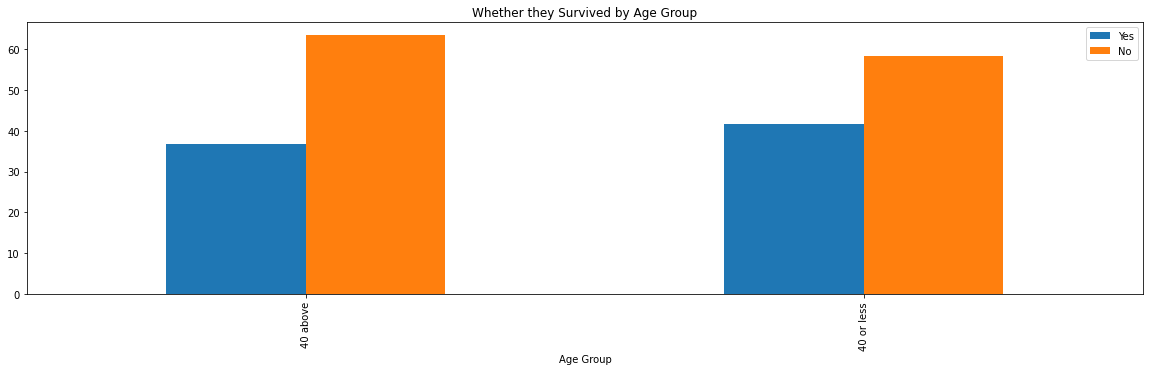

In [58]:
temp = train.loc[:,['Age','Survived']]

# remove those with Null in Age
temp = temp[~temp['Age'].isnull()]

age_lim = 40

temp['Age_grp'] = [f"{age_lim} or less"]*len(temp)
temp['nYes'] = [0]*len(temp)
temp['nNo'] = [0]*len(temp)

temp.loc[train['Age'] > age_lim, "Age_grp"] = f"{age_lim} above"
temp.loc[train['Survived'] == 1, 'nYes'] = 1
temp.loc[train['Survived'] == 0, 'nNo'] = 1

temp = temp.drop(columns = ['Survived']).groupby('Age_grp').sum()

temp['Yes'] = 100 * (temp['nYes'] / (temp['nYes'] + temp['nNo']))
temp['No'] = 100 * (temp['nNo'] / (temp['nYes'] + temp['nNo']))

temp = temp.drop(columns = ['nYes', 'nNo', 'Age'])

temp.plot(kind='bar', figsize=(20,5), title="Whether they Survived by Age Group", xlabel="Age Group")
temp

# 4. Preprocessing

## Remove Features
Here we see some data that might not relate to whether they survive, one is `Name` as it is just strings that does not hold value. So we can remove that ahead.

In [15]:
train = train.drop(columns=['Name'])

## Remove Outliers

We focus on those columns that are not categorical, as they may be more likely to have outliers. We start from the lowest correlation where we see the relationship of the features with its result.

### Outlier in `SibSp`

<AxesSubplot:xlabel='Survived', ylabel='SibSp'>

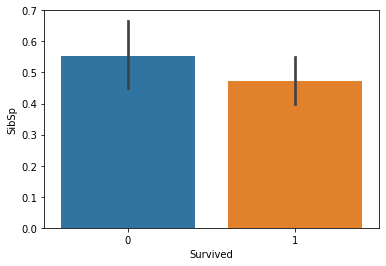

In [69]:
sns.barplot(x = train['Survived'], y = train['SibSp'])

### Outlier in `Age`

<AxesSubplot:xlabel='Survived', ylabel='Age'>

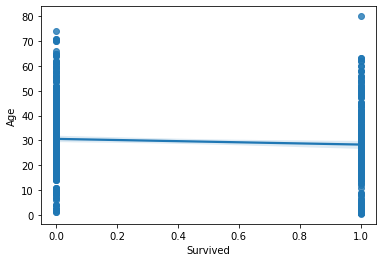

In [68]:
sns.regplot(x = train['Survived'], y = train['Age'])

<AxesSubplot:>

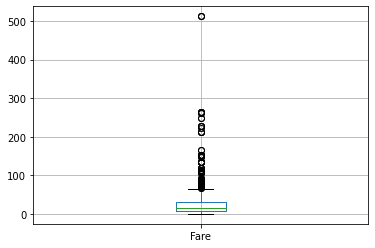

In [48]:
train.boxplot(['Fare'])

## Handling Nulls

Notice in the analysis above some counts are incomplete due to null values, we will look further into those.

### `Age` Feature

From the analysis there are only 714 count of age entry. We cannot leave them in nor fill them with 0 as age below 1 is included. 

In [43]:
train1 = train[~train['Age'].isnull()]

train2 = train
train2.loc[train2['Age'].isnull(),'Age'] = train2['Age'].mean()

## Creating Features

We will create new features based on our previous analysis.

### From `SibSp`

We will create:
* `SibSp_big`: If they have `SibSp` 5 or more then 1, else 0
* `SibSp_sml`: If they have `SibSp` 4 or less then 1, else 0

In [10]:
# Creation of SibSp_big
train['SibSp_big'] = [0]*len(train)
train.loc[train['SibSp'] >= 5, 'SibSp_big'] = 1

# Creation of SibSp_sml
train['SibSp_sml'] = [0]*len(train)
train.loc[train['SibSp'] <= 4, 'SibSp_sml'] = 1

## 5. Train Data

<AxesSubplot:>

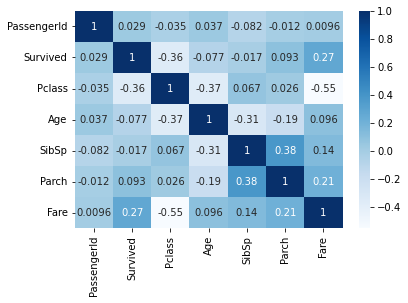

In [38]:
sns.heatmap(train1.corr(), cmap = "Blues", annot=True)

<AxesSubplot:>

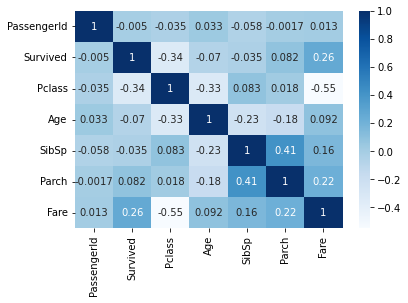

In [45]:
sns.heatmap(train2.corr(), cmap = "Blues", annot=True)

In [33]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [34]:
train[train['Ticket'] == "113572"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [11]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_big,SibSp_sml
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


<AxesSubplot:>

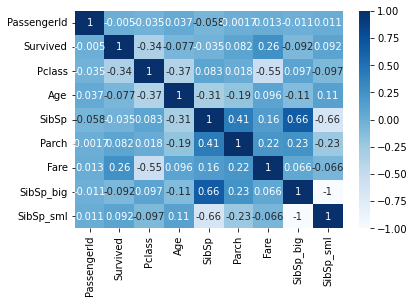

In [12]:
sns.heatmap(train.corr(), cmap = "Blues", annot=True)

In [13]:
pd.DataFrame(train.corr()['Survived']).sort_values(by='Survived', key=abs)[0:-1]

,Survived
PassengerId,-0.005007
SibSp,-0.035322
Age,-0.077221
Parch,0.081629
SibSp_sml,0.092220
SibSp_big,-0.092220
Fare,0.257307
Pclass,-0.338481
